In [1]:
# Load the environment variables for remote logging
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Initialize PyPads and start tracking
# PyPads should be the first import in the experiment 
from pypads.app.base import PyPads

tracker = PyPads(uri="http://mlflow.padre-lab.eu")
tracker.activate_tracking()
tracker.start_track(experiment_name="Keras Example")

2020-10-19 15:55:42.717 | INFO     | pypads.app.base:activate_tracking:566 - Activating tracking by extending importlib...
2020-10-19 15:55:42.965 | WARNING  | pypads.app.misc.managed_git:preserve_changes:84 - There are uncommitted changes in your git!
2020-10-19 15:55:43.722 | WARNING  | pypads.app.misc.managed_git:create_tracking_branch:134 - Stashing, branching out, committing, reverting back and unstashing...
2020-10-19 15:55:44.221 | INFO     | pypads.app.misc.managed_git:preserve_changes:91 - Created branch PyPads/f85f108147e049cbb4f60d2a678b7813
2020-10-19 15:55:45.167 | WARNING  | pypads.app.misc.managed_git:_handle_error:19 - Couldn't initialized git repository because of exception: Preserving commit failed due to INVALID_PARAMETER_VALUE: Tag value 'diff --git a/.env b/.env
new file mode 100644
index 0000000..eaae52e
--- /dev/null
+++ b/.env
@@ -0,0 +1,8 @@
+AWS_ACCESS_KEY_ID=XSHDLTACETFLQURZSAUJ
+AWS_SECRET_ACCESS_KEY=ISvyN9Aay40ZIaMuQcngOCJdzkSqR85ON1ng9PNZ
+MLFLOW_S3_ENDPOI

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________

In [3]:
# Set random seed to avoid non-determininsm
tracker.actuators.set_random_seed(seed=1)

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/torch/distributed/distributed_c10d.py:125: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "


In [4]:
# Example takes from keras documentation https://keras.io/examples/vision/mnist_convnet/
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# MNIST has 10 classes [0-9]
# Each image is a grayscale image of shape 28x28
num_classes = 10
input_shape = (28, 28, 1)

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Create the training and testing datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Scale the input values between 0 and 1

In [7]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [8]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Create the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [12]:
# Set training parameters
batch_size = 128
epochs = 15

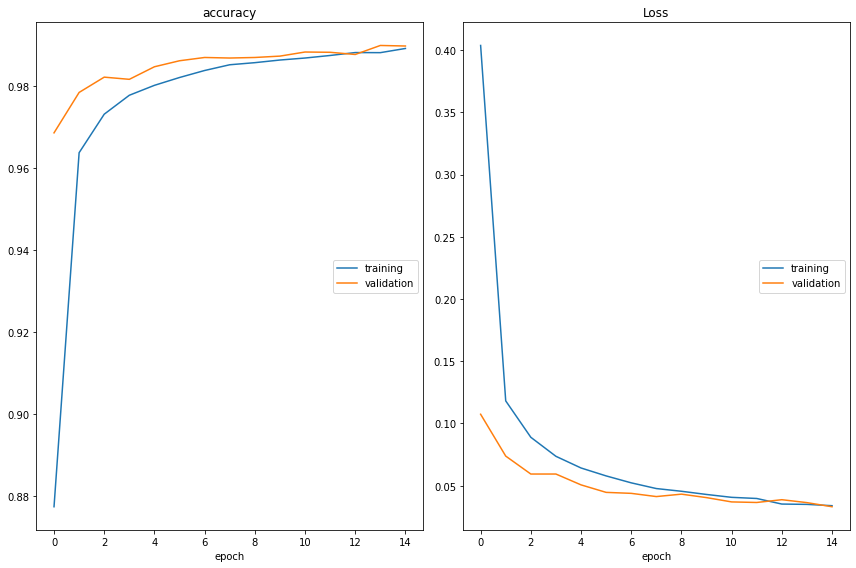

In [13]:
# Train the model
from livelossplot import PlotLossesKeras
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.25, callbacks=[PlotLossesKeras()], verbose=0)

In [14]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Compute the probabilities of the predictions and convert to classes
y_prob = model.predict(x_test)
predicted = y_prob.argmax(axis=-1)

In [16]:
# Use the classification report from sklearn to print metrics
from sklearn.metrics import classification_report
y_test = y_test.argmax(axis=-1)
print(classification_report(y_test, predicted))

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

/home/christofer/PycharmProjects/pypads-notebooks/venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9912

In [18]:
# Logging this metric to PyPads
tracker.api.log_metric(key='Accuracy', value=accuracy, description='Accuracy value')

'1c9d3ac2-eabd-4e0b-8563-707e81d6dd88.metric'

In [19]:
# Now we need to save the model for future references
# Note: Saving large models might be cumbersome and fill up space very quickly
tracker.api.log_mem_artifact(path='final_model', description='Storing the completely trained model as an artifact', 
                             write_format='pickle', obj=model)

'0178205f-bb8a-41e4-8a2e-688291c5ee8a.artifact'

## Logged Info

In [20]:
tracker.api.active_run().info

<RunInfo: artifact_uri='s3://pypads/5/f85f108147e049cbb4f60d2a678b7813/artifacts', end_time=None, experiment_id='5', lifecycle_stage='active', run_id='f85f108147e049cbb4f60d2a678b7813', run_uuid='f85f108147e049cbb4f60d2a678b7813', start_time=1603115742793, status='RUNNING', user_id='christofer'>

In [21]:
artifacts = [artifact for artifact in tracker.results.get_artifacts(run_id=tracker.api.active_run().info.run_id)]
artifacts

### Tag Information

In [22]:
tags = [tag for tag in tracker.results.get_tags(run_id=tracker.api.active_run().info.run_id, name='pypads.system.process.cwd')]
tags

[TagMetaModel(backend_uri='http://mlflow.padre-lab.eu', experiment_id='5', experiment_name='Keras Example', run_id='f85f108147e049cbb4f60d2a678b7813', created_at=1603115746.8629005, clazz="<class 'pypads.model.logger_output.TagMetaModel'>", category='MLTag', storage_type=<ResultType.tag: 'tag'>, uid='ff95858c-e2f0-4011-be73-1387c97f4015', id='ff95858c-e2f0-4011-be73-1387c97f4015.tag', produced_by='9272ed03-c6a9-4467-94b7-ed9d13c13bdc.loggerCall', producer_type=<ResultType.logger_call: 'loggerCall'>, part_of='cc99001e-1fa1-4525-921b-ce81de4966ab.tracked_object', parent_type=<ResultType.tracked_object: 'tracked_object'>, description='Process current working directory', additional_data=None, name='pypads.system.process.cwd', value_format='string', data='/home/christofer/PycharmProjects/pypads-notebooks/single_run/Keras_NeuralNetworks')]

### Metric Information

In [23]:
metrics = [metric for metric in tracker.results.get_metrics(run_id=tracker.api.active_run().info.run_id)]

In [24]:
metrics

[MetricMetaModel(backend_uri='http://mlflow.padre-lab.eu', experiment_id='5', experiment_name='Keras Example', run_id='f85f108147e049cbb4f60d2a678b7813', created_at=1603115873.273812, clazz="<class 'pypads.model.logger_output.MetricMetaModel'>", category='MLMetric', storage_type=<ResultType.metric: 'metric'>, uid='1c9d3ac2-eabd-4e0b-8563-707e81d6dd88', id='1c9d3ac2-eabd-4e0b-8563-707e81d6dd88.metric', produced_by='00000000-0000-0000-0000-000000000000.logger', producer_type=<ResultType.logger: 'logger'>, part_of='24eeb1a5-307a-4aa3-8405-5e4bdd7431c1.output', parent_type=<ResultType.output: 'output'>, description='Accuracy value', additional_data=None, name='Accuracy', step=0, data=0.9912)]

### Tracked Parameters

In [25]:
parameters = [parameter for parameter in tracker.results.get_parameters(run_id=tracker.api.active_run().info.run_id)]
print(parameters)

### End tracking

In [26]:
tracker.api.end_run()